## Importing Libraries

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [294]:
patients=pd.read_csv('patients.csv')
treatment=pd.read_csv('treatments.csv')
adverse=pd.read_csv('adverse_reactions.csv')

In [295]:
print(patients.shape)
print(treatment.shape)
print(adverse.shape)

(503, 14)
(280, 7)
(34, 3)


In [390]:
patients.head(2)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2


In [391]:
treatment.head(2)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97


In [392]:
adverse.head(2)

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia


In [299]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [300]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [301]:
adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [302]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [303]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [304]:
treatment.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [393]:
patients[patients['address'].duplicated()].head(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2


### Quality

[Completeness, Validity, Accuracy, Consistency]

#### `Patients`

- Zip code col is stored in decimal format[V]
- Certain zip codes of 4 digits[V] 
- For the state col sometimes full names are use and other times short forms are used[IC]
- Missing values for contact details of 12 patients[C]
- Incorrect data types for assigned_sex and birthdate cols[A]
- Erroneous data for weights and heights[Accuracy]
- Inconsistent way of storing phone numbers in contact col[IC]
- Duplicate and not useful data in dataset[IC]

#### `Treatments`

- hba1c_change col has missing values[C]
- Novodra and Auralin cols has u attached to numbers[V]
- Only 280 rows are there, instead of 350[C]
- Name and surname col is in lower case[IC]
- Incorrect data type for auralin and novadra cols[V]
- hba1c_change 9 instead of 4[Accuracy]
- use of dashes instead of Nan in aurolin and novodra cols[IC]

#### `Adverse Reactions`

- Name and surname col is in lower case[IC]

### Tidiness

#### `Patients`

- Phone and email together in one col i.e. contact

#### `Treatments`

- 3 variables stored in auralin and novodra cols

#### `Adverse Reactions`

- No point of using this table


# Cleaning Data

You should follow the order provided below:

- Completeness Issues
- Tidiness Issues
- Remaining Data quality issues like validity, accuracy and consistency

### Steps involved in Data cleaning

- Define
- Code 
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [307]:
# Creating copies

patients_copy=patients.copy()
treatment_copy=treatment.copy()
adverse_copy=adverse.copy()

## a. Completeness Issues

- Missing values for contact details of 12 patients
- Only 280 rows are there, instead of 350
- hba1c_change col has missing values

#### Define

In [309]:
# Subtract hba1c_start from hba1c_end to get hba1c_change

#### Code

In [310]:
treatment_copy['hba1c_change']=treatment_copy['hba1c_start']-treatment_copy['hba1c_end']

#### Test

In [311]:
treatment_copy.info()

treatment_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    280 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,280.000000
mean,7.985929,7.589286,0.396643
std,0.568638,0.569672,0.060168
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.350000
50%,7.800000,7.420000,0.390000
75%,7.970000,7.570000,0.440000
max,9.950000,9.580000,0.540000


## b. Tidiness Issues

- Phone + email in contact col `patients`
- Novodra and Aurolin col `treatment`
- Merge the `adverse` table to `treatment` table

#### Define

In [312]:
# Phone + email in contact col patients

In [313]:
patients_copy.dropna(inplace = True)

#### Code

In [314]:
stri = []
for i in patients_copy['contact']:
    stri.append(i)

In [315]:
ph_num = []
email = []
e = []
i = 0

while i <len(stri):
    s = '-'.join(re.findall(r'(\d[0-9]*)',stri[i]))
    ph_num.append(s)
    e.append(stri[i].strip(s))
    
    email.append((re.findall(r'[\w\.-]+@[\w\.-]+',e[i]))[0])
   
    
    i+=1
patients_copy['email'] = email
patients_copy['contact_number'] = ph_num
patients_copy['email'].replace(to_replace = r'1',value=' ',regex= True,inplace = True)
patients_copy['contact_number'].replace(to_replace = r'^1-',value='',regex= True,inplace = True)

In [316]:
patients_copy=patients_copy.drop(columns='contact')

#### Test

In [317]:
patients_copy.head(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,7/10/1976,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,4/3/1967,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,2/19/1980,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,7/26/1951,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,2/18/1928,192.3,27,26.1,TimNeudorf@cuvox.de,334-515-7487
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114.0,United States,8/31/1931,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728.0,United States,11/19/1969,146.3,65,24.3,MaryBAdams@einrot.com,775-533-5933
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037.0,United States,8/13/1958,158.0,60,30.9,XiuxiuChang@einrot.com,408-778-3236
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105.0,United States,3/6/1937,163.9,66,26.5,DavidGustafsson@armyspy.com,816-265-9578
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,12/3/1930,194.7,64,33.4,SophieCabreraIbarra@teleworm.us,718-795-9124


#### Define

In [318]:
# Novodra and Aurolin using the melt function

#### Code

In [319]:
treatment_copy=pd.melt(treatment_copy, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')

In [320]:
treatment_copy=treatment_copy[treatment_copy['dose']!='-']

In [321]:
treatment_copy['start'],treatment_copy['end']=treatment_copy['dose'].str.split('-').str

In [322]:
treatment_copy.drop(columns={'dose'}, inplace=True)

#### Test

In [323]:
treatment_copy.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


## Rest Quality Issues

#### Define

In [327]:
##Zip code col is stored in decimal format[V]

#### Code

In [328]:
patients_copy['zip_code'] = patients_copy['zip_code'].astype(int)

#### Test

In [329]:
patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,7/10/1976,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,4/3/1967,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,2/19/1980,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095,United States,7/26/1951,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,27,26.1,TimNeudorf@cuvox.de,334-515-7487
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114,United States,8/31/1931,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728,United States,11/19/1969,146.3,65,24.3,MaryBAdams@einrot.com,775-533-5933
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037,United States,8/13/1958,158.0,60,30.9,XiuxiuChang@einrot.com,408-778-3236
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,DavidGustafsson@armyspy.com,816-265-9578
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011,United States,12/3/1930,194.7,64,33.4,SophieCabreraIbarra@teleworm.us,718-795-9124


#### Define

In [330]:
#Certain zip codes of 4 digits[V] 

#### Code

In [331]:
num=[]
for i in patients_copy['zip_code']:
    num.append(i)

i = 0
zip_code=[]
while i<len(num):
    zip_code.append("{0:0=5d}".format(num[i]))
    i+=1
patients_copy['zip_code'] = zip_code

#### Test

In [332]:
patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,7/10/1976,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,4/3/1967,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,2/19/1980,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,7/26/1951,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,27,26.1,TimNeudorf@cuvox.de,334-515-7487
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114,United States,8/31/1931,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728,United States,11/19/1969,146.3,65,24.3,MaryBAdams@einrot.com,775-533-5933
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037,United States,8/13/1958,158.0,60,30.9,XiuxiuChang@einrot.com,408-778-3236
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,DavidGustafsson@armyspy.com,816-265-9578
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011,United States,12/3/1930,194.7,64,33.4,SophieCabreraIbarra@teleworm.us,718-795-9124


#### Define

In [333]:
# Incorrect data types for assigned_sex and birthdate cols[A]

#### Code

In [334]:
patients_copy['birthdate'] = pd.to_datetime(patients_copy['birthdate'])

In [335]:
# For encoding catogorial variable 'assigned_sex'

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [336]:
k = []
k.extend(patients_copy['assigned_sex'].values)
e = le.fit_transform(k)

patients_copy['sex'] = e



#### Test

In [337]:
patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number,sex
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390,United States,1976-07-10,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170,0
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812,United States,1967-04-03,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204,0
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467,United States,1980-02-19,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804,1
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246,1
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,27,26.1,TimNeudorf@cuvox.de,334-515-7487,1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,Florida,32114,United States,1931-08-31,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237,1
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728,United States,1969-11-19,146.3,65,24.3,MaryBAdams@einrot.com,775-533-5933,0
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037,United States,1958-08-13,158.0,60,30.9,XiuxiuChang@einrot.com,408-778-3236,0
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,1937-03-06,163.9,66,26.5,DavidGustafsson@armyspy.com,816-265-9578,1
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011,United States,1930-12-03,194.7,64,33.4,SophieCabreraIbarra@teleworm.us,718-795-9124,0


#### Define

In [338]:
##For the state col sometimes full names are use and other times short forms are used[IC]

#### Code

In [339]:
patients_copy['state'].replace(to_replace = r'^California',value='CA',regex= True,inplace = True)
patients_copy['state'].replace(to_replace = r'^Illinois',value='IL',regex= True,inplace = True)
patients_copy['state'].replace(to_replace = r'^New York',value='NY',regex= True,inplace = True)
patients_copy['state'].replace(to_replace = r'^Florida',value='FL',regex= True,inplace = True)
patients_copy['state'].replace(to_replace = r'^Nebraska',value='NE',regex= True,inplace = True)

#### Test


In [340]:
patients_copy['state'].value_counts()

CA    60
NY    47
TX    32
IL    24
MA    22
FL    22
PA    18
GA    15
OH    14
OK    13
LA    13
MI    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
ID     6
NV     6
KS     6
SC     5
IA     5
CT     5
ME     4
CO     4
AZ     4
AR     4
ND     4
RI     4
WV     3
SD     3
DE     3
MD     3
OR     3
DC     2
VT     2
MT     2
WY     1
NH     1
NM     1
AK     1
Name: state, dtype: int64

#### Define

In [341]:
## Duplicate and not useful data in dataset[IC]

#### Code

In [342]:
patients_copy[patients_copy['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number,sex
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,JakobCJakobsen@einrot.com,845-858-7707,1
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,1234567890,1
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,1234567890,1
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,1234567890,1
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,1234567890,1
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,1234567890,1
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,SandraCTaylor@dayrep.com,304-438-2648,0
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,PatrickGersten@rhyta.com,402-848-4923,1


In [343]:
mask1 = patients_copy['address'] != '123 Main Street'
mask2 = patients_copy['given_name']!='John'
patients_copy=patients_copy[mask1 & mask2]

#### Test

In [344]:
patients_copy[patients_copy['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number,sex
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,JakobCJakobsen@einrot.com,845-858-7707,1
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,SandraCTaylor@dayrep.com,304-438-2648,0
502,503,male,Pat,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,PatrickGersten@rhyta.com,402-848-4923,1


#### Define

In [345]:
##Erroneous data for weights and heights[Accuracy]

#### Code

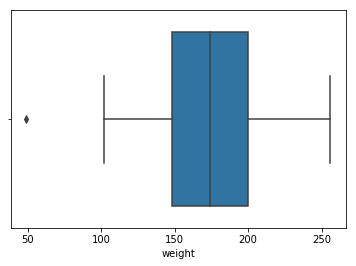

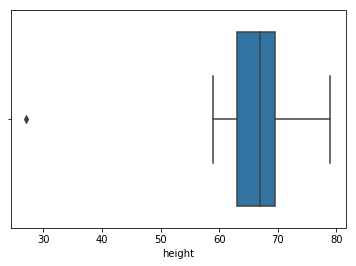

In [347]:
sns.boxplot(x='weight',data=patients_copy)
plt.show()
sns.boxplot(x='height',data=patients_copy)
plt.show()

In [348]:
patients_copy = patients_copy[patients_copy['height']>30]

In [349]:
mask1 = patients_copy['weight']>100
mask2 = patients_copy['weight']<250
patients_copy = patients_copy[mask1 & mask2]

#### Test

In [355]:
patients_copy.shape

(479, 16)

In [351]:
patients_copy.describe()

,patient_id,weight,height,bmi,sex
count,479.000000,479.000000,479.000000,479.000000,479.000000
mean,252.893528,173.047599,66.626305,27.490605,0.494781
std,147.765771,33.369572,4.019854,5.302160,0.500495
min,1.000000,102.100000,59.000000,17.100000,0.000000
25%,122.500000,148.500000,63.000000,23.150000,0.000000
50%,256.000000,172.900000,67.000000,27.200000,0.000000
75%,382.500000,199.400000,69.000000,31.700000,1.000000
max,503.000000,245.500000,79.000000,37.700000,1.000000


In [352]:
patients_copy.head(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number,sex
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170,0
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204,0
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,1980-02-19,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804,1
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246,1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,1931-08-31,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237,1
6,7,female,Mary,Adams,3145 Sheila Lane,Burbank,NV,84728,United States,1969-11-19,146.3,65,24.3,MaryBAdams@einrot.com,775-533-5933,0
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037,United States,1958-08-13,158.0,60,30.9,XiuxiuChang@einrot.com,408-778-3236,0
8,9,male,Dsvid,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,1937-03-06,163.9,66,26.5,DavidGustafsson@armyspy.com,816-265-9578,1
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,NY,10011,United States,1930-12-03,194.7,64,33.4,SophieCabreraIbarra@teleworm.us,718-795-9124,0
10,11,female,Sandy,Gunnarsson,87 Wood Duck Drive,Rudyard,MI,49780,United States,1974-07-16,199.3,62,36.4,SandyGunnarsson@dayrep.com,906-478-8949,0


#### Define

In [385]:
## in treatment data set
## Name and surname col is in lower case[IC]


#### Code

In [386]:
k = []
f = []
for i in treatment_copy['given_name']:
    k.append(i.title())
    
for i in treatment_copy['surname']:
    f.append(i.title())
treatment_copy['given_name'] = k
treatment_copy['surname'] = f


#### Test

In [399]:
treatment_copy.head(2)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41u,48u
3,Skye,Gormanston,7.97,7.62,0.35,auralin,33u,36u


#### Define

In [389]:
##Adverse Reactions

###Name and surname col is in lower case[IC]

#### Code

In [396]:
k = []
f = []
for i in adverse_copy['given_name']:
    k.append(i.title())
    
for i in adverse_copy['surname']:
    f.append(i.title())
adverse_copy['given_name'] = k
adverse_copy['surname'] = f


#### Test

In [398]:
adverse_copy.head(2)

,given_name,surname,adverse_reaction
0,Berta,Napolitani,injection site discomfort
1,Lena,Baer,hypoglycemia


#### Define

In [400]:
# Merge the adverse table to treatment table

#### Code

In [432]:
adverse_df = pd.merge(treatment_copy,adverse_copy, on = ['given_name','surname'],how='inner')

In [463]:
adverse_df.drop_duplicates(keep = 'last',inplace=True)

#### Test

In [464]:
adverse_df.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
0,Joseph,Day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
2,Clinton,Miller,7.79,7.40,0.39,auralin,42u,51u,throat irritation
3,Louise,Johnson,7.63,7.32,0.31,auralin,32u,42u,hypoglycemia
4,Finley,Chandler,7.65,7.26,0.39,auralin,31u,45u,headache
5,Idalia,Moore,8.34,7.90,0.44,auralin,25u,31u,hypoglycemia


## Final Data Sets

In [470]:
patients_copy.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,contact_number,sex
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,66,19.6,ZoeWellish@superrito.com,951-719-9170,0
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,66,19.2,PamelaSHill@cuvox.de,217-569-3204,0
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,1980-02-19,177.8,71,24.8,JaeMDebord@gustr.com,402-363-6804,1
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,PhanBaLiem@jourrapide.com,732-636-8246,1
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,1931-08-31,183.9,70,26.4,RafaelCardosoCosta@gustr.com,386-334-5237,1


In [469]:
treatment_copy.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41u,48u
3,Skye,Gormanston,7.97,7.62,0.35,auralin,33u,36u
6,Sophia,Haugen,7.65,7.27,0.38,auralin,37u,42u
7,Eddie,Archer,7.89,7.55,0.34,auralin,31u,38u
9,Asia,Woźniak,7.76,7.37,0.39,auralin,30u,36u


In [471]:
adverse_df.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
0,Joseph,Day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
2,Clinton,Miller,7.79,7.40,0.39,auralin,42u,51u,throat irritation
3,Louise,Johnson,7.63,7.32,0.31,auralin,32u,42u,hypoglycemia
4,Finley,Chandler,7.65,7.26,0.39,auralin,31u,45u,headache
5,Idalia,Moore,8.34,7.90,0.44,auralin,25u,31u,hypoglycemia
